Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.6016042780748663

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       0.57      0.79      0.66       374
           1       0.66      0.41      0.51       374

    accuracy                           0.60       748
   macro avg       0.62      0.60      0.59       748
weighted avg       0.62      0.60      0.59       748


Confusion Matrix (Empatica Model LR):
 [[  0 374]
 [  0 374]]

Confusion Matrix (Samsung Model LR):
 [[295  79]
 [219 155]]


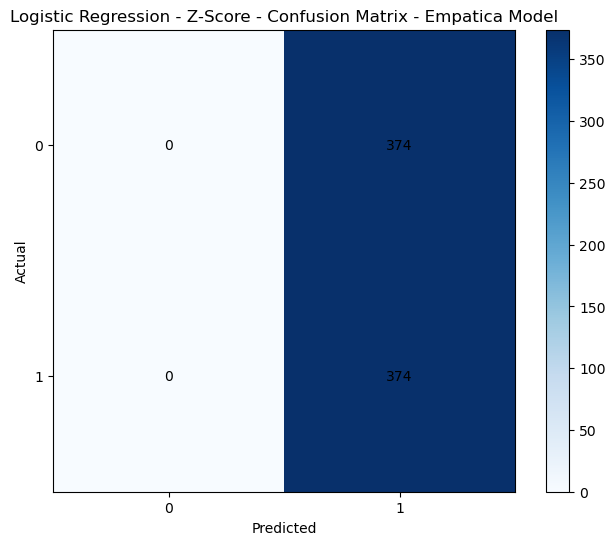

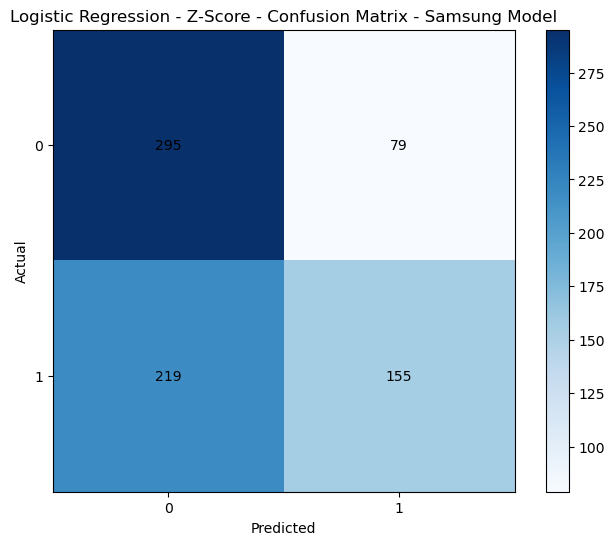

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define Logistic Regression models
model_empatica_lr = LogisticRegression(random_state=42)
model_samsung_lr = LogisticRegression(random_state=42)

# Train the models
model_empatica_lr.fit(X_train_empatica, y_train_empatica)
model_samsung_lr.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_lr = model_empatica_lr.predict(X_test_empatica)
y_pred_samsung_lr = model_samsung_lr.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr, zero_division=1),
)


# Confusion matrix
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)

print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Visualize the confusion matrix for Empatica Model (LR)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_lr, cmap="Blues")
plt.title("Logistic Regression - Z-Score - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model (LR)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_lr, cmap="Blues")
plt.title("Logistic Regression - Z-Score - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

Empatica Model (LR) Accuracy: 0.5
Samsung Model (LR) Accuracy: 0.6029411764705882

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       0.58      0.78      0.66       374
           1       0.66      0.43      0.52       374

    accuracy                           0.60       748
   macro avg       0.62      0.60      0.59       748
weighted avg       0.62      0.60      0.59       748


Confusion Matrix (Empatica Model LR):
 [[  0 374]
 [  0 374]]

Confusion Matrix (Samsung Model LR):
 [[292  82]
 [215 159]]


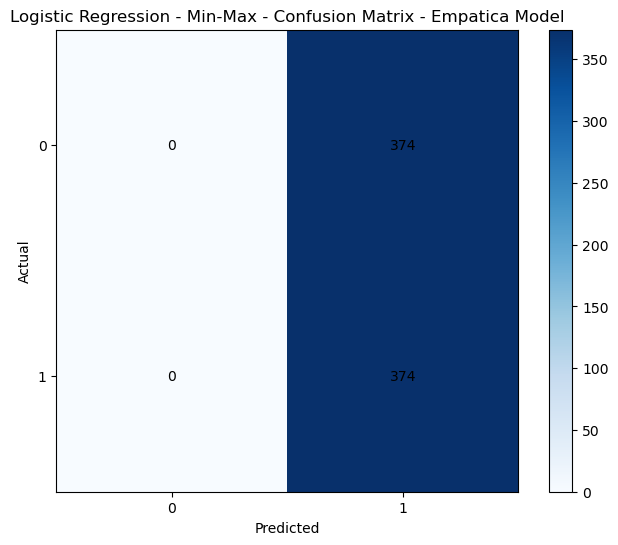

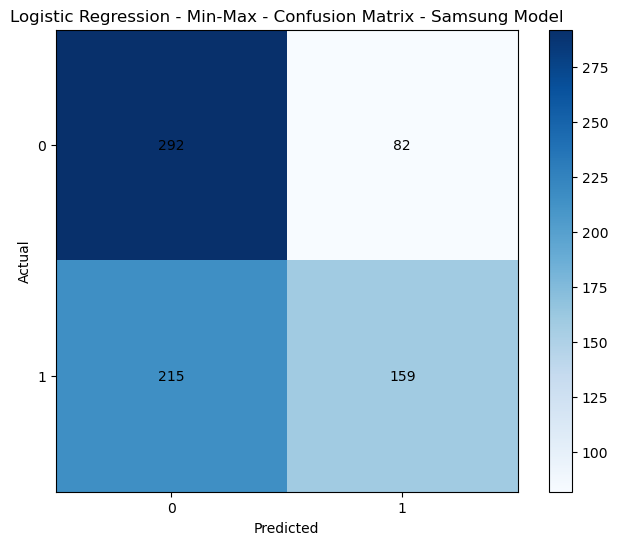

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define Logistic Regression models
model_empatica_lr = LogisticRegression(random_state=42)
model_samsung_lr = LogisticRegression(random_state=42)

# Train the models
model_empatica_lr.fit(X_train_empatica, y_train_empatica)
model_samsung_lr.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_lr = model_empatica_lr.predict(X_test_empatica)
y_pred_samsung_lr = model_samsung_lr.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr, zero_division=1),
)
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr, zero_division=1),
)


# Confusion matrix
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)

print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Visualize the confusion matrix for Empatica Model (LR)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_lr, cmap="Blues")
plt.title("Logistic Regression - Min-Max - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model (LR)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_lr, cmap="Blues")
plt.title("Logistic Regression - Min-Max - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

## Grid Search

Before training the models, a grid search for tuning the parameters can be employed, to improve the models performance.


Best Parameters (Empatica): {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Best Parameters (Samsung): {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Empatica Model (LR) Accuracy: 0.8970588235294118
Samsung Model (LR) Accuracy: 0.6042780748663101

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.79      0.89       374
           1       0.83      1.00      0.91       374

    accuracy                           0.90       748
   macro avg       0.91      0.90      0.90       748
weighted avg       0.91      0.90      0.90       748


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       0.60      0.64      0.62       374
           1       0.61      0.56      0.59       374

    accuracy                           0.60       748
   macro avg       0.60      0.60      0.60       748
weighted avg       0.60      0.60      0.60 

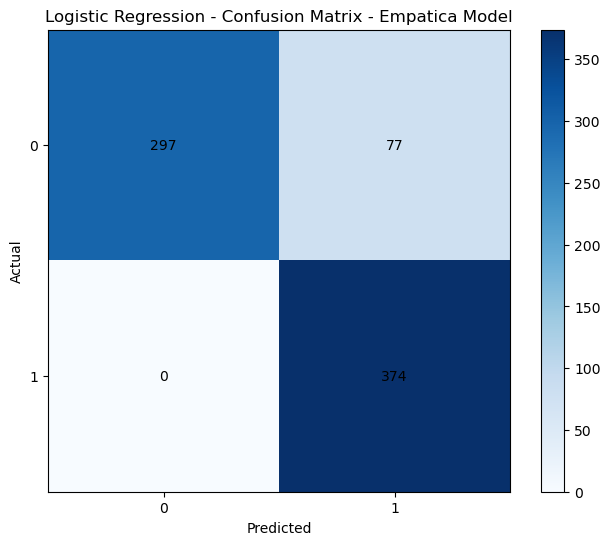

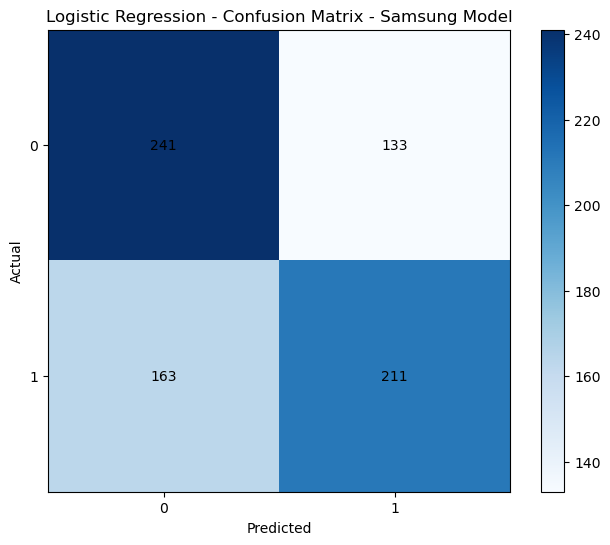

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define parameter grid for grid search
param_grid_empatica = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

param_grid_samsung = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

# Perform grid search for Empatica Model
grid_search_empatica = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_empatica, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Perform grid search for Samsung Model
grid_search_samsung = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_samsung, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best parameters
best_params_empatica = grid_search_empatica.best_params_
print("Best Parameters (Empatica):", best_params_empatica)

best_params_samsung = grid_search_samsung.best_params_
print("Best Parameters (Samsung):", best_params_samsung)

# Use the best models
best_model_empatica = grid_search_empatica.best_estimator_
best_model_samsung = grid_search_samsung.best_estimator_

# Predictions for Empatica Model
y_pred_empatica_lr = best_model_empatica.predict(X_test_empatica)

# Predictions for Samsung Model
y_pred_samsung_lr = best_model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report for Empatica Model
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr),
)

# Classification report for Samsung Model
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr),
)

# Confusion matrix for Empatica Model
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)

# Confusion matrix for Samsung Model
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_lr, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_lr, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

Best Parameters (Empatica): {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Best Parameters (Samsung): {'C': 0.001, 'class_weight': None, 'solver': 'liblinear'}
Empatica Model (LR) Accuracy: 0.8970588235294118
Samsung Model (LR) Accuracy: 0.6042780748663101

Classification Report (Empatica Model LR):
               precision    recall  f1-score   support

           0       1.00      0.79      0.89       374
           1       0.83      1.00      0.91       374

    accuracy                           0.90       748
   macro avg       0.91      0.90      0.90       748
weighted avg       0.91      0.90      0.90       748


Classification Report (Samsung Model LR):
               precision    recall  f1-score   support

           0       0.60      0.64      0.62       374
           1       0.61      0.56      0.59       374

    accuracy                           0.60       748
   macro avg       0.60      0.60      0.60       748
weighted avg       0.60      0.60      0.60 

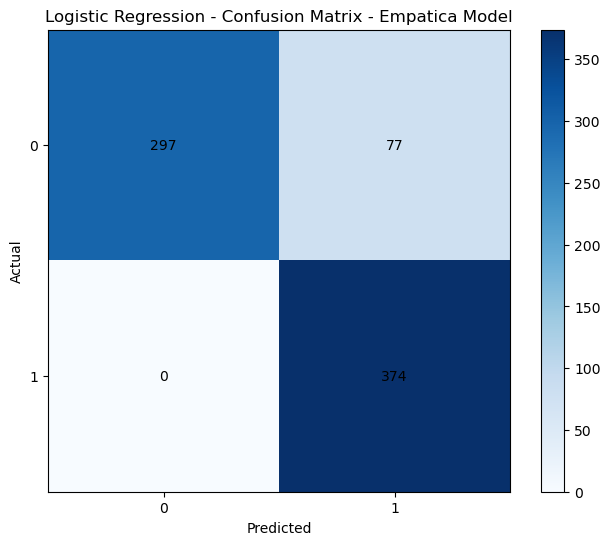

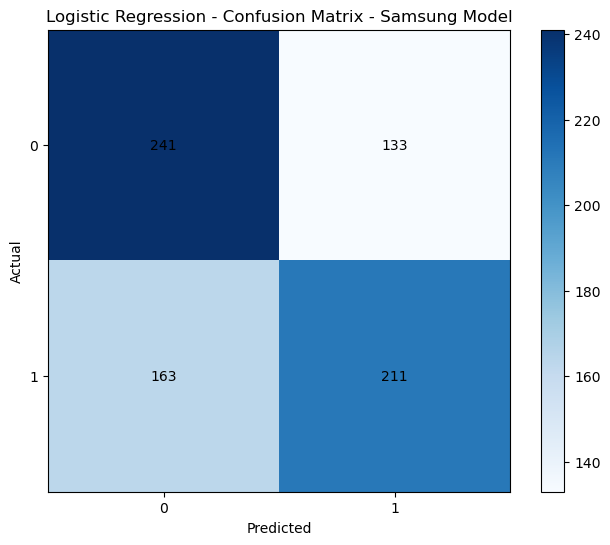

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define parameter grid for grid search
param_grid_empatica = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

param_grid_samsung = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"],  # Solver algorithm
    "class_weight": [None, "balanced"],  # Class weight
}

# Perform grid search for Empatica Model
grid_search_empatica = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_empatica, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Perform grid search for Samsung Model
grid_search_samsung = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_samsung, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best parameters
best_params_empatica = grid_search_empatica.best_params_
print("Best Parameters (Empatica):", best_params_empatica)

best_params_samsung = grid_search_samsung.best_params_
print("Best Parameters (Samsung):", best_params_samsung)

# Use the best models
best_model_empatica = grid_search_empatica.best_estimator_
best_model_samsung = grid_search_samsung.best_estimator_

# Predictions for Empatica Model
y_pred_empatica_lr = best_model_empatica.predict(X_test_empatica)

# Predictions for Samsung Model
y_pred_samsung_lr = best_model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_lr = accuracy_score(y_test_empatica, y_pred_empatica_lr)
accuracy_samsung_lr = accuracy_score(y_test_samsung, y_pred_samsung_lr)

print("Empatica Model (LR) Accuracy:", accuracy_empatica_lr)
print("Samsung Model (LR) Accuracy:", accuracy_samsung_lr)

# Classification report for Empatica Model
print(
    "\nClassification Report (Empatica Model LR):\n",
    classification_report(y_test_empatica, y_pred_empatica_lr),
)

# Classification report for Samsung Model
print(
    "\nClassification Report (Samsung Model LR):\n",
    classification_report(y_test_samsung, y_pred_samsung_lr),
)

# Confusion matrix for Empatica Model
conf_mat_empatica_lr = confusion_matrix(y_test_empatica, y_pred_empatica_lr)
print("\nConfusion Matrix (Empatica Model LR):\n", conf_mat_empatica_lr)

# Confusion matrix for Samsung Model
conf_mat_samsung_lr = confusion_matrix(y_test_samsung, y_pred_samsung_lr)
print("\nConfusion Matrix (Samsung Model LR):\n", conf_mat_samsung_lr)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_lr, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_lr.shape[0]):
    for j in range(conf_mat_empatica_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_lr, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_lr.shape[0]):
    for j in range(conf_mat_samsung_lr.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_lr[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()